In [1]:
#lets first install class requirements
!pip install numpy
!pip install torch
!pip install torchvision
!pip install torchaudio
!pip install torchtext
!pip install opencv-python
!pip install transformers
!pip install matplotlib
!pip install datasets 
!pip install jupyter
!pip install pandas
!pip install tiktoken 
!pip install wandb 
!pip install tqdm
!pip install albumentations
!pip install onnxruntime
!pip install Pillow
!pip install imageio
!pip install regex
!pip install sounddevice
!pip install librosa
!pip install gdown
!pip install gallery-dl
!pip install ultralytics
!pip install scikit-learn
!pip install scikit-image
!pip install acids-ircam
!pip install wget
!pip install pydantic

  Using cached torch-2.1.2-cp39-none-macosx_11_0_arm64.whl.metadata (25 kB)
Using cached torch-2.1.2-cp39-none-macosx_11_0_arm64.whl (59.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.0
    Uninstalling torch-2.2.0:
      Successfully uninstalled torch-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.0 requires torch==2.2.0, but you have torch 2.1.2 which is incompatible.
torchtext 0.17.0 requires torch==2.2.0, but you have torch 2.1.2 which is incompatible.
  Using cached torch-2.2.0-cp39-none-macosx_11_0_arm64.whl.metadata (25 kB)
Using cached torch-2.2.0-cp39-none-macosx_11_0_arm64.whl (59.7 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2
    Uninstalling torch-2.1.2:
      Successfully uninstalled torch-2.1.2
ERROR: pip's dependency resolver does not currently take into accou

In this project we will use the dataset described below to build a classifier and a GAN for comparative analysis between fake image detecters, as well as we will consider further literature and current research of deepfake to drwa conclusions and outline potential research questions. 

# "Real vs Fake Faces"  
by Udit Sharma is a dataset on Kaggle who had been only for many years now. It can be found here: https://www.kaggle.com/datasets/uditsharma72/real-vs-fake-faces?rvi=1 
Instead of using the project online I will focus on how I can add to the given data, and what analysis could give a original insight into AI media analysis. 

# First Data preparation 
First I planned to use the split folder function found here in stackoverflow: https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified to split my real and fake images into 3 different folders each, train, test and validation. However, I ended up using a course approach (modifying our course material and adding the training section, I did have some help of Terence in class)

In [1]:
!pip install split-folders

In [44]:
!pip install imutils

In [59]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 5.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 1

In [2]:
import os
import torch
import torchvision
import cv2
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.utils as vutils
import torchvision.transforms as transforms
import argparse

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from imutils import paths
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from sklearn.utils import resample
from sklearn.metrics import classification_report

In [3]:
device = 'mps' #My Mac has an M1 chip 
momentum = 0.9
num_epochs = 20
num_classes = 2 #fake & real 
val_size = 0.3
batch_size = 100
learn_rate = 0.001
freeze_lower_layers = True
data_path = "/Users/jillcakmak/Documents/GitHub/AI_Project/image_data"

In [4]:
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomAffine(degrees=(-30,30),translate=(0.15,0.15),scale=(0.85,1.15)),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
        transforms.RandomResizedCrop(size=(224, 224), antialias=True),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [5]:
val_transform = transforms.Compose(
    [   
        torchvision.transforms.Resize(224, antialias=True),
        torchvision.transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [6]:
dataset = ImageFolder(data_path, transform=train_transform)
num_classes = 2 #len(dataset.classes)

# Get length of dataset and indicies
num_train = len(dataset)
indices = list(range(num_train))

# Get train / val split for data points
train_indices, test_indices = train_test_split(indices, test_size=val_size, random_state=42)
train_indices, val_indices = train_test_split(train_indices, test_size=val_size, random_state=42)

# Override dataset classes to only be samples for each split
train_subset = torch.utils.data.Subset(dataset, train_indices)
test_subset = torch.utils.data.Subset(dataset, test_indices)
val_subset = torch.utils.data.Subset(dataset, val_indices)

# Create data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

Lets visualise the training, validation and test images 

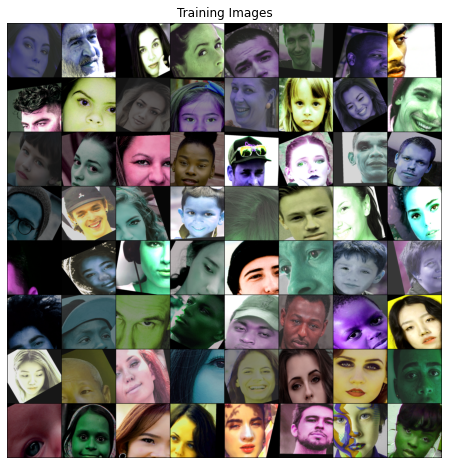

In [7]:
# Plot some training images
real_batch = next(iter(train_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

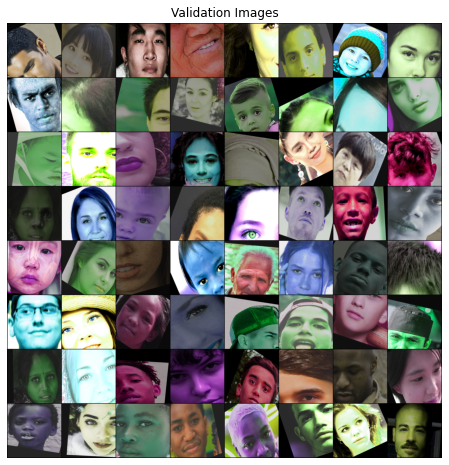

In [8]:
# Plot some validation images
real_batch = next(iter(val_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Validation Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

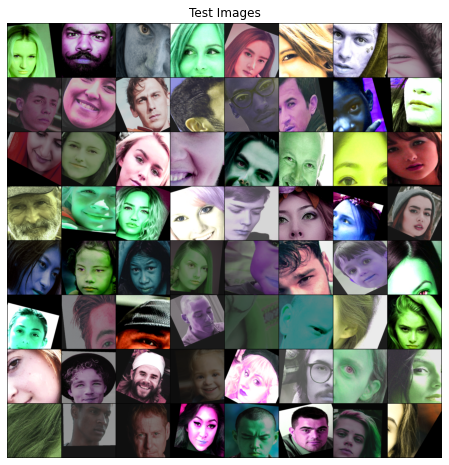

In [9]:
# Plot some test images
real_batch = next(iter(test_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Test Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

Okay now we will use a pre-trained model, as learned in Week 3,this will give us better results as we do it from scratch, due to our small datatset. 

In [75]:
model = torchvision.models.resnet18(weights='IMAGENET1K_V1')

# Freeze weights
if freeze_lower_layers == True:
    for param in model.parameters():
        param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model.to(device)

#this code was originally sources from: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html as described in class

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [76]:
# Cross entropy loss for training classification
criterion = nn.CrossEntropyLoss()

# Stochastic gradient descent loss
optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=momentum)

In [ ]:
#lets train and calculate validation loss 

In [77]:
train_losses = []
val_losses = []

best_loss = 100000
for epoch in range(num_epochs): 
    train_loss = 0.0
    
    # Training loop
    for i, data in enumerate(train_loader, 0):
        # Get data
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Process data
        outputs = model(inputs)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        
        # Update model weights
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()
    
    # Validation loop
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    # Normalise cumulative losses to dataset size
    train_loss = train_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)
    
    # Added cumulative losses to lists for later display
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch + 1}, train loss: {train_loss:.3f}, val loss: {val_loss:.3f}')
    
    # if validation score is lowest so far, save the model
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_finetuned_model.pt')

Epoch 1, train loss: 0.746, val loss: 0.716
Epoch 2, train loss: 0.736, val loss: 0.747
Epoch 3, train loss: 0.734, val loss: 0.804
Epoch 4, train loss: 0.722, val loss: 0.738
Epoch 5, train loss: 0.710, val loss: 0.711
Epoch 6, train loss: 0.677, val loss: 0.694
Epoch 7, train loss: 0.671, val loss: 0.697
Epoch 8, train loss: 0.670, val loss: 0.705
Epoch 9, train loss: 0.679, val loss: 0.721
Epoch 10, train loss: 0.666, val loss: 0.703
Epoch 11, train loss: 0.688, val loss: 0.689
Epoch 12, train loss: 0.669, val loss: 0.720
Epoch 13, train loss: 0.665, val loss: 0.679
Epoch 14, train loss: 0.655, val loss: 0.720
Epoch 15, train loss: 0.664, val loss: 0.701
Epoch 16, train loss: 0.664, val loss: 0.710
Epoch 17, train loss: 0.661, val loss: 0.697
Epoch 18, train loss: 0.664, val loss: 0.689
Epoch 19, train loss: 0.655, val loss: 0.706
Epoch 20, train loss: 0.663, val loss: 0.688


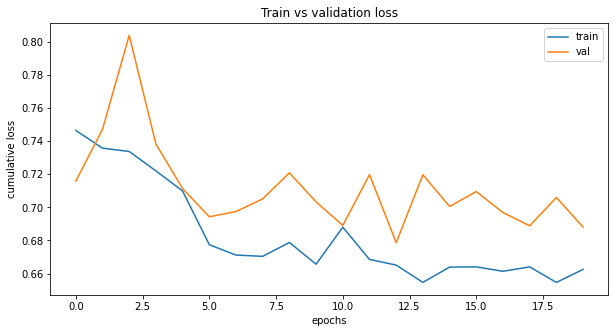

In [78]:
#Plotting Training and Validation loss 
plt.figure(figsize=(10,5))
plt.title("Train vs validation loss")
plt.plot(train_losses,label="train")
plt.plot(val_losses,label="val")
plt.xlabel("epochs")
plt.ylabel("cumulative loss")
plt.legend()
plt.show()

In [ ]:
    #torch_im = transform(img)
    #torch_im = torch_im.unsqueeze(0)
    #pred = model(torch_im)
    #rating = get_dog_rating(pred.item())
   # print(f'We give this doggo a rating of {rating:.2f}/10')

In [82]:
    # Training loop from above modified for test
total= 0
correct = 0

for i, data in enumerate(test_loader, 0):
        # Get data
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Process data
        outputs = model(inputs)

        # Compute predictions #this part is from chat-gpt 
        _, predicted = torch.max(outputs.data, 1)

         # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [83]:
# Print the accuracy
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 57 %


#### The accuracy of the Resnet-18 Network with 20 Epochs is 57% 
The accuracy outcome is not as good as expected as it could represent only a good guess and not a create model 

Let's check if the classifier will be better if we align the faces, as we do not know if the classifier looks at face features, pixels or other details. Because clearly it is not a transparent AI. <br>I read and used about the face alignment code s from https://www.geeksforgeeks.org/face-alignment-with-opencv-and-python/ by abhilashgau,and I  utilised the face.py code from Louis Busby, STEM for Creatives 23/24 Week 8, you can find the repository here:https://git.arts.ac.uk/lmccallum/STEM-4-Creatives-23-24/blob/main/faces.py , you can find my attempt to apply the code in the new notebook called **AI_face_alignment. 

Additionally I traine more versions of a CNN with the same data with different models. You can find them in the other part1 Notebooks. 
- Resnet-50 
- Densenet-169 (as 201 didn't work)
- Densenet- 40 Epochs